# 21. We can clearly observe a weekend-effect in the number of daily travelers? However, some stations experience more travelers during the weekend. Which stations are this? Plot them on a map of Belgium and try to deduct a reasoning to what causes these stations to observe an opposed effect?

In [1]:
%cd ..


/home/seoyangsam/PycharmProjects/group7-group-assignment-


In [51]:
# import packages
from data_processing import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import geopandas as gpd

In [3]:
data.travelers.head()

,Unnamed: 0,Station,week,saturday,sunday,sum
0,0,aalst,6444.0,1768.0,1592.0,9804.0
1,1,aalst-kerrebroek,27.0,0.0,0.0,NaN
2,2,aalter,2288.0,1055.0,855.0,4198.0
3,3,aarschot,6270.0,1954.0,1395.0,9619.0
4,4,aarsele,34.0,0.0,0.0,NaN


In [4]:
travelers = data.travelers[data.travelers['sunday'] + data.travelers['saturday'] > data.travelers['week']]

In [5]:
travelers.head()

,Unnamed: 0,Station,week,saturday,sunday,sum
13,13,anseremme,51.0,124.0,45.0,220.0
16,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0
32,32,aywaille,180.0,87.0,95.0,362.0
57,57,bierges-walibi,146.0,504.0,562.0,1212.0
60,60,binche,335.0,187.0,154.0,676.0


In [6]:
stations = data.stations[["name","longitude","latitude"]]

In [9]:
# Standardize name for stations
stations['name'] = stations['name'].str.lower()
stations = stations.replace({"name": utils.Dict})

/tmp/ipykernel_19814/1214608936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['name'] = stations['name'].str.lower()


In [10]:
stations.head()


,name,longitude,latitude
3,aalst,4.039653,50.942813
4,aalst-kerrebroek,4.024407,50.948377
5,aalter,3.447848,51.092295
6,aarschot,4.824043,50.984406
7,aarsele,3.418363,50.984460


In [11]:
travelers = travelers.rename(index=str, columns={'Station': 'name'})

In [12]:
travelers.head()

,Unnamed: 0,name,week,saturday,sunday,sum
13,13,anseremme,51.0,124.0,45.0,220.0
16,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0
32,32,aywaille,180.0,87.0,95.0,362.0
57,57,bierges-walibi,146.0,504.0,562.0,1212.0
60,60,binche,335.0,187.0,154.0,676.0


In [13]:
travelers = travelers.merge(stations, on='name')

In [14]:
travelers.head()

,Unnamed: 0,name,week,saturday,sunday,sum,longitude,latitude
0,13,anseremme,51.0,124.0,45.0,220.0,4.905530,50.238023
1,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0,4.421101,51.217200
2,32,aywaille,180.0,87.0,95.0,362.0,5.672499,50.472938
3,57,bierges-walibi,146.0,504.0,562.0,1212.0,4.594746,50.707772
4,60,binche,335.0,187.0,154.0,676.0,4.172451,50.408764


In [15]:
# use !pip install geopandas to install package 

In [22]:
# read in file in geopandas data structure
map_df = gpd.read_file('./Data/Unprocessed/BELGIUM_-_Provinces/BELGIUM_-_Provinces.shp')

In [23]:
map_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4..."
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ..."
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ..."
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ..."
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1..."


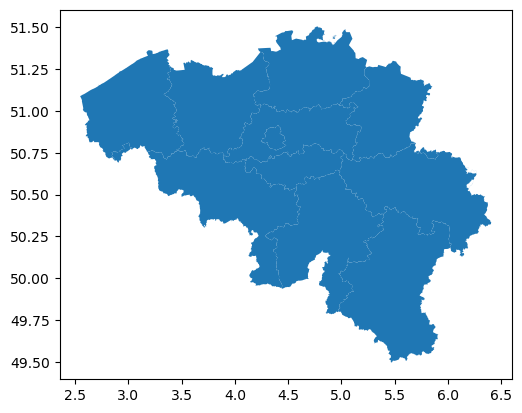

In [24]:
# show
map_df.plot()

In [27]:
dict = {'Name': travelers["name"], 'lat': travelers["latitude"], 'lon': travelers["longitude"]}
stations_df = pd.DataFrame(dict, columns = ['Name', 'lat', 'lon'])
stations_df

,Name,lat,lon
0,anseremme,50.238023,4.905530
1,antwerpen-centraal,51.217200,4.421101
2,aywaille,50.472938,5.672499
3,bierges-walibi,50.707772,4.594746
4,binche,50.408764,4.172451
...,...,...,...
69,vielsalm,50.278933,5.909211
70,watermaal/watermael,50.809170,4.399887
71,welkenraedt,50.659707,5.975381
72,yvoir,50.320840,4.878643


In [28]:
gdf = gpd.GeoDataFrame(
    stations_df, geometry=gpd.points_from_xy(stations_df.lon, stations_df.lat))

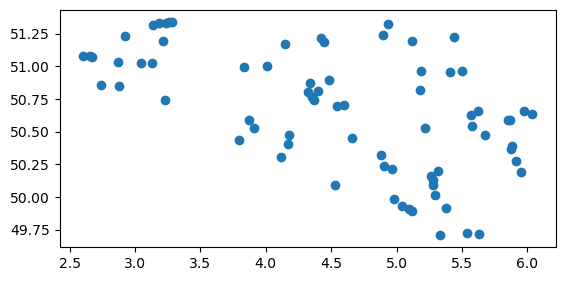

In [29]:
gdf.plot()

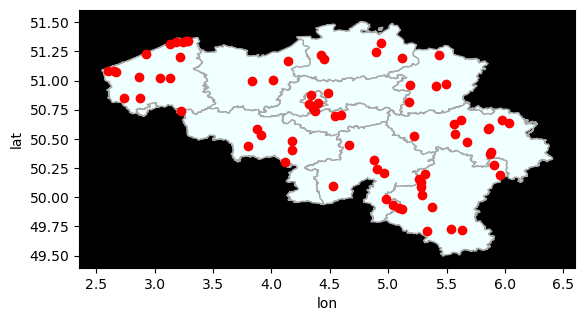

In [49]:
map_be = gpd.read_file('./Data/Unprocessed/BELGIUM_-_Provinces/BELGIUM_-_Provinces.shp')

ax = map_be.plot(
    color='#F0FFFF', edgecolor='darkgrey')
ax.patch.set_facecolor("black")

# We can now plot those stations on the Belgium map
gdf.plot( ax=ax, color='red')
plt.xlabel("lon")
plt.ylabel("lat")
plt.show()

The possible reason why those stations have more traverls on weekends is because :
1. for stations near the seaside: people go for fun 
2. stations near the border: people go abroad 
3. big stations like brussel: people go for taking flight
etc

In [32]:
# now we plot the facilities of those stations 
data.facilities.head()

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


In [33]:
col_list= data.facilities.columns[5:22]
# sum specific columns
data.facilities['num_facilities'] = data.facilities[col_list].sum(axis=1)

In [34]:
data.facilities.head()

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday,num_facilities
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,12.0
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1.0
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,7.0
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,9.0
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1.0


In [35]:
travelers = travelers.merge(data.facilities, on='name')

In [36]:
travelers.head()

,Unnamed: 0,name,week,saturday,sunday,sum,longitude,latitude,URI,street,...,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday,num_facilities
0,13,anseremme,51.0,124.0,45.0,220.0,4.905530,50.238023,008863818,Rue Des Tilleuls,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3.0
1,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0,4.421101,51.217200,008821006,Koningin Astridplein 27,...,0 days 22:00:00,0 days 05:45:00,0 days 22:00:00,0 days 05:45:00,0 days 22:00:00,0 days 05:45:00,0 days 22:00:00,0 days 05:45:00,0 days 22:00:00,17.0
2,32,aywaille,180.0,87.0,95.0,362.0,5.672499,50.472938,008842754,Place Marcellis 3,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,5.0
3,57,bierges-walibi,146.0,504.0,562.0,1212.0,4.594746,50.707772,008811718,Rue De La Wastinne,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1.0
4,60,binche,335.0,187.0,154.0,676.0,4.172451,50.408764,008882362,Place Derbaix,...,0 days 13:00:00,0 days 05:45:00,0 days 13:00:00,0 days 05:45:00,0 days 13:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,5.0


In [37]:
input_plot = travelers[["name","num_facilities"]]

/tmp/ipykernel_19814/2892762296.py:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=len(input_plot))


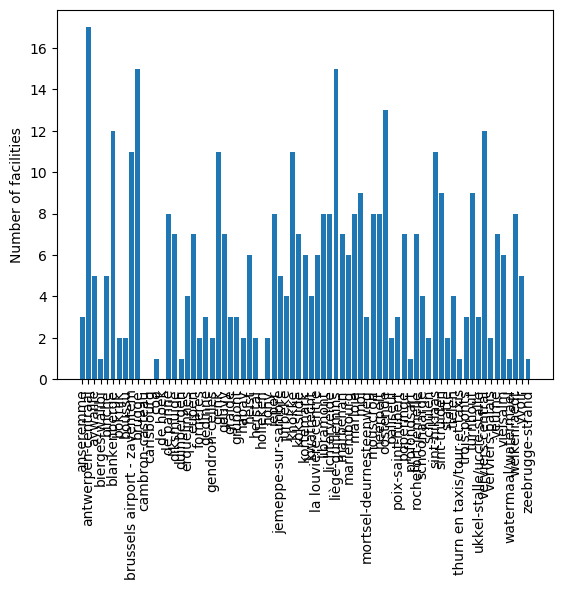

In [38]:
fig, ax = plt.subplots()
plt.bar(input_plot['name'], input_plot['num_facilities'])
plt.locator_params(axis='x', nbins=len(input_plot))
plt.ylabel('Number of facilities')
plt.xticks(rotation = 90)
plt.show()

so we think the number of facilities is not a factor why those station have more travelers on weekend

now let's take a look at the sales opening time. For stations which opens on weekends, do they have more travelers on weekends?

In [39]:
data.facilities['sales_open_weekend'] = data.facilities['sales_open_saturday']+ data.facilities['sales_open_sunday']

In [40]:
data.facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday,num_facilities,sales_open_weekend
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,12.0,0 days 12:00:00
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1.0,0 days 00:00:00
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,7.0,0 days 15:30:00
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,9.0,0 days 13:00:00
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1.0,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3.0,0 days 00:00:00
669,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3.0,0 days 00:00:00
670,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 07:15:00,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,8.0,0 days 14:30:00
672,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3.0,0 days 00:00:00


In [41]:
facilities = data.facilities.query('sales_open_weekend != "0 days 00:00:00"')

In [42]:
travelers = data.travelers.rename(index=str, columns={'Station': 'name'})

In [43]:
travelers

,Unnamed: 0,name,week,saturday,sunday,sum
0,0,aalst,6444.0,1768.0,1592.0,9804.0
1,1,aalst-kerrebroek,27.0,0.0,0.0,NaN
2,2,aalter,2288.0,1055.0,855.0,4198.0
3,3,aarschot,6270.0,1954.0,1395.0,9619.0
4,4,aarsele,34.0,0.0,0.0,NaN
...,...,...,...,...,...,...
548,548,zingem,523.0,98.0,86.0,707.0
549,549,zolder,123.0,38.0,37.0,198.0
550,550,zonhoven,67.0,29.0,19.0,115.0
551,551,zottegem,4936.0,986.0,931.0,6853.0


In [44]:
facilities = facilities.merge(travelers, on='name')

In [45]:
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_saturday,sales_open_sunday,sales_close_sunday,num_facilities,sales_open_weekend,Unnamed: 0,week,saturday,sunday,sum
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,12.0,0 days 12:00:00,0,6444.0,1768.0,1592.0,9804.0
1,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,7.0,0 days 15:30:00,2,2288.0,1055.0,855.0,4198.0
2,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,9.0,0 days 13:00:00,3,6270.0,1954.0,1395.0,9619.0
3,008863404,andenne,Rue De La Station 47 B,5300,Seilles,1.0,1.0,1.0,1.0,1.0,...,0 days 14:30:00,0 days 00:00:00,0 days 00:00:00,9.0,0 days 07:15:00,10,1746.0,499.0,427.0,2672.0
4,008821121,antwerpen-berchem,Burgemeester Edgar Ryckaertsplein 1,2600,Berchem,1.0,1.0,1.0,1.0,1.0,...,0 days 20:30:00,0 days 06:30:00,0 days 20:30:00,10.0,0 days 12:45:00,15,17289.0,8163.0,8506.0,33958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,008896149,waregem,Noorderlaan 71,8790,Waregem,1.0,0.0,1.0,0.0,1.0,...,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,8.0,0 days 15:30:00,519,2473.0,933.0,942.0,4348.0
81,008841400,waremme,Place Rongvaux 14,4300,Waremme,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 00:00:00,0 days 00:00:00,8.0,0 days 07:00:00,520,2283.0,522.0,347.0,3152.0
82,008844503,welkenraedt,Place De La Gare 11,4840,Welkenraedt,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 00:00:00,0 days 00:00:00,8.0,0 days 07:00:00,525,1755.0,1430.0,1004.0,4189.0
83,008893559,wetteren,Stationsplein,9230,Wetteren,1.0,0.0,1.0,0.0,1.0,...,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,7.0,0 days 14:30:00,529,2535.0,930.0,827.0,4292.0


In [46]:
facilities = facilities[facilities['sunday'] + facilities['saturday'] > facilities['week']]

In [47]:
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_saturday,sales_open_sunday,sales_close_sunday,num_facilities,sales_open_weekend,Unnamed: 0,week,saturday,sunday,sum
5,008821006,antwerpen-centraal,Koningin Astridplein 27,2018,Antwerpen,1.0,1.0,1.0,1.0,1.0,...,0 days 22:00:00,0 days 05:45:00,0 days 22:00:00,17.0,0 days 11:30:00,16,39628.0,23918.0,18553.0,82099.0
8,008891405,blankenberge,Leopold III-Plein,8370,Blankenberge,1.0,1.0,1.0,1.0,1.0,...,0 days 21:00:00,0 days 07:15:00,0 days 21:00:00,12.0,0 days 14:30:00,62,1790.0,1348.0,1679.0,4817.0
11,008891009,brugge,Stationsplein 5,8000,Brugge,1.0,1.0,1.0,1.0,1.0,...,0 days 21:30:00,0 days 06:00:00,0 days 21:30:00,15.0,0 days 12:00:00,93,18091.0,12737.0,12249.0,43077.0
16,008819406,brussels airport - zaventem,Luchthaven-Brussel-Nationaal,1930,Zaventem,1.0,0.0,0.0,1.0,0.0,...,0 days 22:45:00,0 days 06:15:00,0 days 22:45:00,11.0,0 days 12:30:00,91,10751.0,6386.0,7456.0,24593.0
19,008892338,de panne,Stationsplein 9,8660,De Panne,1.0,0.0,1.0,0.0,1.0,...,0 days 18:30:00,0 days 11:15:00,0 days 18:30:00,8.0,0 days 22:30:00,125,876.0,601.0,731.0,2208.0
27,008844628,eupen,Bahnhofstrasse 2,4700,Eupen,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,7.0,0 days 14:00:00,162,560.0,582.0,420.0,1562.0
30,008831765,genk,Europalaan 39,3600,Genk,1.0,0.0,1.0,1.0,1.0,...,0 days 14:00:00,0 days 00:00:00,0 days 00:00:00,11.0,0 days 06:45:00,194,888.0,715.0,1422.0,3025.0
36,008891645,heist,Stationsplein 1,8301,Knokke-Heist,1.0,0.0,1.0,0.0,1.0,...,0 days 14:40:00,0 days 07:15:00,0 days 14:40:00,6.0,0 days 14:30:00,233,414.0,208.0,258.0,880.0
40,008896503,ieper,R. Colaertplein 35,8900,Ieper,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 00:00:00,0 days 00:00:00,8.0,0 days 07:00:00,262,1190.0,613.0,718.0,2521.0
42,008891660,knokke,M. Lippensplein 25,8300,Knokke,1.0,0.0,1.0,1.0,1.0,...,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,11.0,0 days 15:30:00,280,786.0,778.0,971.0,2535.0


In [48]:
ratio = 24/85
print(ratio)

0.2823529411764706


we can easyliy see that in the dataset which stations open on weekend, out of 85 rows only 24 rows that have more travelers on weekend, so we can conclude that sales open on weekend does not determing the week-weekend effect 

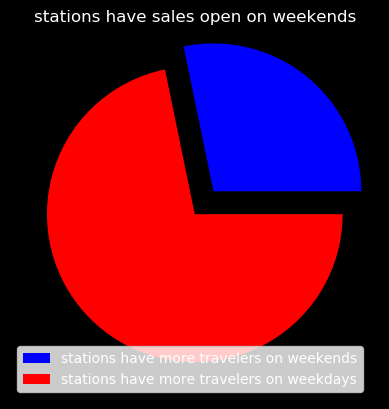

In [67]:
y = np.array([24, 61])
mylabels = ["stations have more travelers on weekends", "stations have more travelers on weekdays"]
myexplode = [0.2, 0]
mycolors = ["blue", "red"]
fig = plt.figure()
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'
plt.pie(y, explode = myexplode, colors = mycolors)
plt.legend(labels = mylabels)
plt.title("stations have sales open on weekends")
plt.show() 